In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, 
                       activation='relu'),
    keras.layers.Dense(10, 
                       activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2254 - accuracy: 0.9343
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0911 - accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0609 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9892


In [4]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9803


[0.06623624265193939, 0.9803000092506409]

In [5]:
predicted = model.predict(X_test)

In [6]:
predicted_labels = [np.argmax(i) for i in predicted]

In [7]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)

Text(69.0, 0.5, 'Expected')

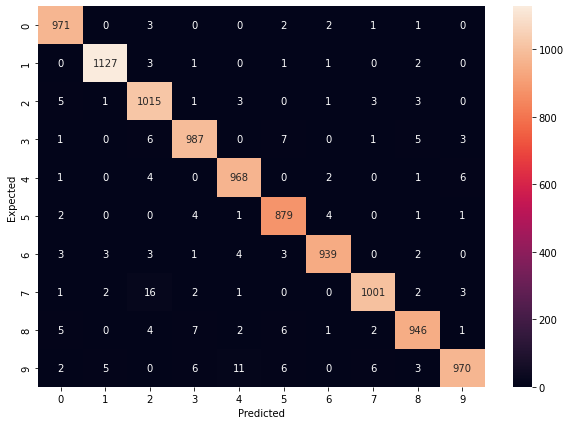

In [8]:
!pip install seaborn --quiet
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')
